In [1]:
import lightkurve as lk
%matplotlib inline

In [2]:
ID = '167746025' 
target = 'TIC'+' '+ID
TIC_number = 'TIC_'+ID

In [3]:
search_result=lk.search_lightcurve(target ,author='SPOC',exptime=20)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 32,2020,SPOC,20,167746025,0.0
1,TESS Sector 33,2020,SPOC,20,167746025,0.0


In [4]:
lc_collection=search_result.download_all()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

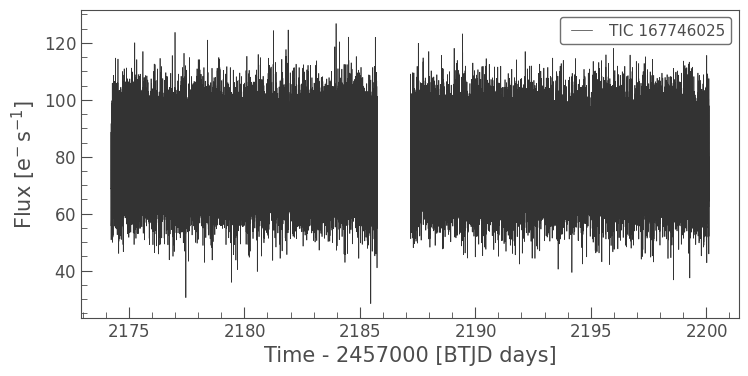

In [5]:
lc_first_sector = lc_collection[0]
lc_first_sector.plot()

In [31]:
import numpy as np
import pandas as pd
lc_all= lc_collection.stitch()
result = lc_all.to_pandas()
result = result.reset_index()
result

,time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,2174.230690,0.858118,0.125138,0.002576,4090062,1872.927625,1446.292434,44.358433,5.577027,225.785400,...,NaN,NaN,NaN,NaN,1872.927625,0.061138,1446.292434,0.055253,0.153567,-0.027994
1,2174.230922,0.840438,0.125384,0.002576,4090063,1872.898041,1446.225278,44.586170,5.588014,226.473923,...,NaN,NaN,NaN,NaN,1872.898041,0.059857,1446.225278,0.055848,0.111142,0.007989
2,2174.231153,0.953967,0.126903,0.002576,4090064,1872.880122,1446.252609,49.636166,5.655702,231.931381,...,NaN,NaN,NaN,NaN,1872.880122,0.053720,1446.252609,0.050328,0.131000,0.040925
3,2174.231385,1.106714,0.127214,0.002576,4090065,1872.876534,1446.269520,55.859978,5.669568,232.887375,...,NaN,NaN,NaN,NaN,1872.876534,0.047653,1446.269520,0.044623,0.156251,0.031988
4,2174.231616,1.075922,0.126511,0.002576,4090066,1872.800810,1446.201796,54.835827,5.638226,227.439056,...,NaN,NaN,NaN,NaN,1872.800810,0.046256,1446.201796,0.046129,0.135246,0.024277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212675,2227.574401,1.069481,0.145863,0.002098,4320509,1967.569680,1814.473253,61.264957,6.884910,328.043976,...,NaN,NaN,NaN,NaN,1967.569680,0.050000,1814.473253,0.080020,-0.031614,0.096934
212676,2227.574632,1.061015,0.145878,0.002098,4320510,1967.701776,1814.383176,60.838913,6.885618,331.828156,...,NaN,NaN,NaN,NaN,1967.701776,0.051068,1814.383176,0.077858,-0.015584,0.047548
212677,2227.574864,1.210012,0.145893,0.002098,4320511,1967.670793,1814.195970,68.203300,6.886347,327.244141,...,NaN,NaN,NaN,NaN,1967.670793,0.045227,1814.195970,0.068252,-0.021275,0.040573
212678,2227.575095,1.002280,0.145677,0.002098,4320512,1967.722194,1814.453046,58.071789,6.876112,333.369904,...,NaN,NaN,NaN,NaN,1967.722194,0.053892,1814.453046,0.083747,-0.022338,0.117539


In [36]:
b = lc_collection[0].time[0]
for n in range (len(lc_collection[0].time)):
    if np.isnan(lc_collection[0].flux[n]):
        print('not yet')
        c = lc_collection[n].time
        #break;
    else:
        a = result.time[n]
        print(a)
c = 2186
print(a, b, c)

2174.23069022877
2174.230921713874
2174.231153198978
2174.231384684082
2174.231616169187
2174.2318476542914
2174.2320791396282
2174.2323106247322
2174.2325421098362
2174.23277359494
2174.233005080044
2174.233236565148
2174.233468050252
2174.233699535356
2174.2348569611086
2174.235088446213
2174.2353199313166
2174.235551416421
2174.2357829015245
2174.236014386629
2174.2362458717334
2174.2364773568374
2174.2367088419414
2174.2369403270454
2174.2371718121494
2174.237634782359
2174.237866267463
2174.2380977527996
2174.2383292379036
2174.2385607230076
2174.2387922081116
2174.239023693215
2174.2392551783196
2174.239486663423
2174.2397181485276
2174.239949633631
2174.2401811187356
2174.240412603839
2174.2406440889436
2174.240875574047
2174.2411070591515
2174.241338544488
2174.2415700295924
2174.241801514696
2174.2420329998004
2174.242264484904
2174.2424959700083
2174.242727455112
2174.2429589402163
2174.2431904253212
2174.2434219104252
2174.2436533955292
2174.2438848806332
2174.244347850841
2

In [39]:
result1 = result[(result['time']>=b) & (result['time']<=c)] 
result1.plot.scatter(x='time', y='pdcsap_flux', title= TIC_number+'raw1 result1 (first half)')
result2 = result[(result['time']>=c) & (result['time']<=a)]
result2.plot.scatter(x='time', y='pdcsap_flux', title= TIC_number+'raw1 result2 (second half)')

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'Time'